In [1]:
#THIS CODE IS STRUCTURED ON THE PROVISIONS OF SCRIPTS (3,4) PROVIDED BY PROFESSOR CHASE

# importing relevant libraries

import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import statsmodels.formula.api as smf # predictive modeling with nice outputs

import numpy as np 

from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# specifying file name
file = './birthweight_low.xlsx'


# reading the file into Python
L_birthw = pd.read_excel(io = file)


# outputting the first ten rows of the dataset
L_birthw.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [2]:
# finding the missing values in each column of the table
L_birthw.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [3]:
#filling all missing values for column - "meduc"
meduc_mdn = L_birthw ['meduc'].median()
L_birthw['meduc'].fillna(value = meduc_mdn,
                       inplace = True)
#filling all missing values for column - "npvis"
npvis_mdn = L_birthw ['npvis'].median()
L_birthw['npvis'].fillna(value = npvis_mdn,
                       inplace = True)

#filling all missing values for column - "feduc"
feduc_mdn = L_birthw['feduc'].median()
L_birthw['feduc'].fillna(value = feduc_mdn,
                       inplace = True)

In [4]:
#checking missing values in the columns
L_birthw.isnull().any()

mage      False
meduc     False
monpre    False
npvis     False
fage      False
feduc     False
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool

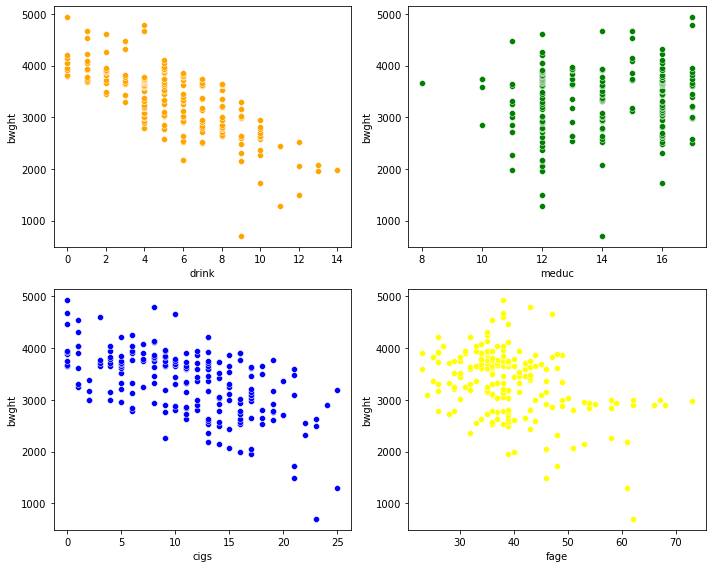

In [5]:
########################
# Displaying data in the form of Scatterplots
########################

# setting the figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot for display
plt.subplot(2, 2, 1)
sns.scatterplot(x = L_birthw['drink'],
                y = L_birthw['bwght'],
                color = 'orange')


# adding labels but not adding a title
plt.xlabel(xlabel = 'drink')
plt.ylabel(ylabel = 'bwght')



########################



# developing a scatterplot for different variables
plt.subplot(2, 2, 2)
sns.scatterplot(x = L_birthw['meduc'],
                y = L_birthw['bwght'],
                color = 'g')


# adding labels but not adding a title
plt.xlabel(xlabel = 'meduc')
plt.ylabel(ylabel = 'bwght')



########################


# developing a scatterplot for different variables
plt.subplot(2, 2, 3)
sns.scatterplot(x = L_birthw['cigs'],
                y = L_birthw['bwght'],
                color = 'blue')


# adding labels but not adding a title
plt.xlabel(xlabel = 'cigs')
plt.ylabel(ylabel = 'bwght')


########################


# developing a scatterplot for different variables
plt.subplot(2, 2, 4)
sns.scatterplot(x = L_birthw['fage'],
                y = L_birthw['bwght'],
                color = 'yellow')


# adding labels but not adding a title
plt.xlabel(xlabel = 'fage')
plt.ylabel(ylabel = 'bwght')



########################


# simplifying the layout and displaying the result

plt.tight_layout()
plt.show()

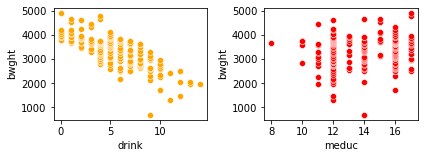

In [6]:
# developing a scatterplot for different variables
plt.subplot(2, 2, 1)
sns.scatterplot(x = L_birthw['drink'],
                y = L_birthw['bwght'],
                color = 'orange')


# adding labels but not adding a title
plt.xlabel(xlabel = 'drink')
plt.ylabel(ylabel = 'bwght')



##################

# developing a scatterplot for different variables
plt.subplot(2, 2, 2)
sns.scatterplot(x = L_birthw['meduc'],
                y = L_birthw['bwght'],
                color = 'red')


# adding labels but not adding a title
plt.xlabel(xlabel = 'meduc')
plt.ylabel(ylabel = 'bwght')

# simplifying the layout and displaying the result
plt.tight_layout()
plt.show()



In [7]:
#creating a continuous data list
continuous_data = [ 'bwght', 'mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc',
                   'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth',  'fwhte',
                   'fblck', 'foth']

#correlation matrix for continuous features
L_birthw_corr = L_birthw[continuous_data].corr(method = 'pearson')


#filtering the data to show correlations for - Sale_Price
L_birthw_corr.loc[ : , continuous_data].round(decimals = 2).sort_values(ascending = False,
                                                                      by="bwght")

,bwght,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth
bwght,1.00,-0.46,0.09,-0.05,0.06,-0.40,0.13,-0.57,-0.74,0.11,-0.11,0.13,-0.02,-0.04,0.12,-0.08
feduc,0.13,-0.09,0.62,-0.29,0.02,-0.01,1.00,0.05,-0.12,0.08,-0.41,-0.13,0.52,-0.36,-0.15,0.52
mblck,0.13,-0.02,-0.19,0.13,-0.09,-0.06,-0.13,-0.20,-0.11,0.12,-0.48,1.00,-0.57,-0.46,0.89,-0.44
fblck,0.12,0.04,-0.23,0.03,-0.07,-0.03,-0.15,-0.19,-0.10,0.11,-0.44,0.89,-0.50,-0.53,1.00,-0.48
male,0.11,-0.05,-0.03,-0.08,0.00,-0.09,0.08,-0.12,-0.09,1.00,-0.10,0.12,-0.03,-0.03,0.11,-0.08
meduc,0.09,-0.09,1.00,-0.23,0.14,-0.07,0.62,0.10,-0.07,-0.03,-0.28,-0.19,0.46,-0.18,-0.23,0.43
npvis,0.06,-0.05,0.14,-0.34,1.00,-0.06,0.02,0.04,-0.07,0.00,0.04,-0.09,0.06,0.03,-0.07,0.03
moth,-0.02,0.02,0.46,-0.21,0.06,0.03,0.52,0.17,-0.04,-0.03,-0.44,-0.57,1.00,-0.31,-0.50,0.83
fwhte,-0.04,-0.08,-0.18,0.04,0.03,-0.03,-0.36,-0.01,0.07,-0.03,0.84,-0.46,-0.31,1.00,-0.53,-0.49
monpre,-0.05,0.16,-0.23,1.00,-0.34,0.04,-0.29,-0.06,0.02,-0.08,0.08,0.13,-0.21,0.04,0.03,-0.07


In [8]:
#L_birthw['log_bwght'] = np.log(L_birthw['bwght'])
L_birthw['log_meduc'] = np.log(L_birthw['meduc'])
L_birthw['log_fage']   = np.log(L_birthw['fage'])


#sum +0.0009 to avoid syntax
L_birthw['log_drink']   = np.log(L_birthw['drink'] + 0.00009)


In [9]:
#retrieving information
for column in L_birthw:
    print(column + '+' )

mage+
meduc+
monpre+
npvis+
fage+
feduc+
omaps+
fmaps+
cigs+
drink+
male+
mwhte+
mblck+
moth+
fwhte+
fblck+
foth+
bwght+
log_meduc+
log_fage+
log_drink+


In [10]:
#creating a continuous data list 
continuous_data_log = [ 'bwght','mage', 'meduc', 'monpre', 'npvis','fage', 
                       'feduc', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 
                       'moth', 'fwhte', 'fblck' , 'foth','log_meduc', 
                       'log_fage',  'log_drink']
                  

# developing a correlation matrix based on continuous features
L_birthw_corr = L_birthw[continuous_data_log].corr(method = 'pearson')


# filter to show correlation for - Sale_Price
L_birthw_corr.loc[ : , continuous_data_log].round(decimals = 2).sort_values(ascending = False,
                                                                      by="bwght")

,bwght,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,log_meduc,log_fage,log_drink
bwght,1.00,-0.46,0.09,-0.05,0.06,-0.40,0.13,-0.57,-0.74,0.11,-0.11,0.13,-0.02,-0.04,0.12,-0.08,0.09,-0.38,-0.41
feduc,0.13,-0.09,0.62,-0.29,0.02,-0.01,1.00,0.05,-0.12,0.08,-0.41,-0.13,0.52,-0.36,-0.15,0.52,0.62,-0.00,-0.05
mblck,0.13,-0.02,-0.19,0.13,-0.09,-0.06,-0.13,-0.20,-0.11,0.12,-0.48,1.00,-0.57,-0.46,0.89,-0.44,-0.19,-0.06,-0.05
fblck,0.12,0.04,-0.23,0.03,-0.07,-0.03,-0.15,-0.19,-0.10,0.11,-0.44,0.89,-0.50,-0.53,1.00,-0.48,-0.23,-0.05,-0.02
male,0.11,-0.05,-0.03,-0.08,0.00,-0.09,0.08,-0.12,-0.09,1.00,-0.10,0.12,-0.03,-0.03,0.11,-0.08,-0.03,-0.08,-0.14
meduc,0.09,-0.09,1.00,-0.23,0.14,-0.07,0.62,0.10,-0.07,-0.03,-0.28,-0.19,0.46,-0.18,-0.23,0.43,1.00,-0.05,-0.06
log_meduc,0.09,-0.09,1.00,-0.23,0.14,-0.07,0.62,0.11,-0.07,-0.03,-0.27,-0.19,0.45,-0.18,-0.23,0.42,1.00,-0.06,-0.07
npvis,0.06,-0.05,0.14,-0.34,1.00,-0.06,0.02,0.04,-0.07,0.00,0.04,-0.09,0.06,0.03,-0.07,0.03,0.14,-0.06,0.03
moth,-0.02,0.02,0.46,-0.21,0.06,0.03,0.52,0.17,-0.04,-0.03,-0.44,-0.57,1.00,-0.31,-0.50,0.83,0.45,0.02,-0.02
fwhte,-0.04,-0.08,-0.18,0.04,0.03,-0.03,-0.36,-0.01,0.07,-0.03,0.84,-0.46,-0.31,1.00,-0.53,-0.49,-0.18,-0.02,0.00


In [11]:
#retrieving information
for column in L_birthw:
    print(column +' +' )
    

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
bwght +
log_meduc +
log_fage +
log_drink +


In [12]:
# Step_1:Initiate model object
lm_best = smf.ols(formula = """bwght ~ drink +
                                       cigs +
                                       meduc +
                                       fage""",
                  data = L_birthw)


# Step_2: input data into the model
results = lm_best.fit()


# Step_3: output analysis
print(results.summary())

L_birthw.info()

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     107.8
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           6.89e-48
Time:                        21:54:04   Log-Likelihood:                -1430.3
No. Observations:                 196   AIC:                             2871.
Df Residuals:                     191   BIC:                             2887.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4515.1549    220.003     20.523      0.0

In [13]:
#creating data to present data with relation
L_birthw_data   = L_birthw.drop(["bwght"],
                                            axis = 1)

L_birthw_target = L_birthw.loc[ : , "bwght"]


#training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
            L_birthw_data,
            L_birthw_target,
            test_size = 0.25,
            random_state = 219)


# dataset model shape review
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 20)
y-side: (147,)


Testing Data
------------
X-side: (49, 20)
y-side: (49,)



In [14]:
#generating data list 
x_variables_1 = ['mage','monpre', 'npvis', 'fage','feduc', 'cigs', 'drink',
                'male', 'mwhte','mblck','moth','fwhte','fblck', 'foth','log_meduc',
              'log_monpre','log_fage','log_feduc', 'log_npvis']
#
for val in x_variables_1:
    print(f"{val} +")

mage +
monpre +
npvis +
fage +
feduc +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
log_meduc +
log_monpre +
log_fage +
log_feduc +
log_npvis +


In [15]:
# merge X_train and y_train to use statsmodels
L_birthw_train = pd.concat([x_train, y_train], axis = 1)


lm_best = smf.ols(formula = """bwght ~  meduc+
                                        cigs +
                                        drink + 
                                        fage  
                                        
                                        """,
                            data = L_birthw_train)

# Step_2: input data into the model
results = lm_best.fit()


# Step_3: output analysis
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     77.18
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.21e-34
Time:                        21:54:04   Log-Likelihood:                -1079.8
No. Observations:                 147   AIC:                             2170.
Df Residuals:                     142   BIC:                             2184.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4501.1742    261.011     17.245      0.0

In [16]:
x_variables_2 = ['meduc', 'cigs', 'drink','fage']

In [17]:
# outputting the first 5 rows of the dataset
L_birthw.head(n=5)
#filling missing values with - medians
meduc_med = L_birthw ['meduc'].median()
L_birthw['meduc'].fillna(value = meduc_med,
                       inplace = True)
npvis_med = L_birthw ['npvis'].median()
L_birthw['npvis'].fillna(value = npvis_med,
                       inplace = True)
feduc_med = L_birthw['feduc'].median()
L_birthw['feduc'].fillna(value = feduc_med,
                       inplace = True)

In [18]:
# applying model from scikit-learn

# preparing x-variables from the OLS model
ols_data = L_birthw.loc[:, x_variables_2]
L_birthw_target = L_birthw.loc[:,"bwght"]


###############################################
# set up multiple one train-test splits 
###############################################
# FULL X-dataset 
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            L_birthw_data,     # x-variables
            L_birthw_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            L_birthw_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [19]:
# Installing a model object
lr = LinearRegression()


# training data generation
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# new data hypothesis
lr_pred = lr_fit.predict(x_test_OLS)


# result score output
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# display and save - the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6849
OLS Testing Score  : 0.7134
OLS Train-Test Gap : 0.0285


In [20]:
lr_model_values = zip(L_birthw[x_variables_2].columns,
                      lr_fit.coef_.round(decimals = 2))


# placeholder list to store features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature - coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# result
for pair in lr_model_lst:
    print(pair)

('intercept', 4501.17)
('meduc', 31.87)
('cigs', -39.23)
('drink', -116.89)
('fage', -13.62)


In [21]:
import sklearn.linear_model

In [22]:
# Installing a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# generating training data
lasso_fit = lasso_model.fit(x_train_OLS, y_train_OLS)


# hypothesis for the new data
lasso_pred = lasso_fit.predict(x_test_OLS)


# result
print('Lasso Training Score :', lasso_model.score(x_train_OLS, y_train_OLS).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_OLS, y_test_OLS).round(4))



#scoring data for future use
lasso_train_score = lasso_model.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# display and save - the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.6839
Lasso Testing Score  : 0.7209
Lasso Train-Test Gap : 0.037


In [23]:
# zipping each feature name to its coefficient
lasso_model_values = zip(L_birthw.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4527.76)
('mage', 25.44)
('meduc', -37.52)
('monpre', -115.25)
('npvis', -12.73)


In [24]:


# dropping coefficients = zero

# printing out each feature-coefficient pair
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
#results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4527.76)
('mage', 25.44)
('meduc', -37.52)
('monpre', -115.25)
('npvis', -12.73)


In [25]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_OLS)


print('Training Score:', ard_model.score(x_train_OLS, y_train_OLS).round(4))
print('Testing Score :',  ard_model.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
ard_train_score =  ard_model.score(x_train_OLS, y_train_OLS).round(4)
ard_test_score  = ard_model.score(x_test_OLS, y_test_OLS).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.6843
Testing Score : 0.7216
ARD Train-Test Gap : 0.0373


In [26]:
# zipping each feature name to its coefficient
ard_model_values = zip(L_birthw.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4573.02)
('mage', 24.13623)
('meduc', -38.2507)
('monpre', -117.72606)
('npvis', -12.88275)


In [27]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4573.02)
('mage', 24.13623)
('meduc', -38.2507)
('monpre', -117.72606)
('npvis', -12.88275)


In [28]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")





Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.6849           0.7134
Lasso      0.6839           0.7209
ARD        0.6843           0.7216



In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# Initiating a StandardScaler() object
scaler = StandardScaler()


# replacing with housing_data
scaler.fit(L_birthw)


# regenerating the data  after fit
x_scaled = scaler.transform(L_birthw)


# converting the scaled dataset into a a DataFrame
x_scaled_L_birthw = pd.DataFrame(x_scaled)


# result output
x_scaled_L_birthw.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,...,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.68,-2.91,-0.99,-2.27,-1.82,-4.98,-3.94,-6.10,-1.80,-1.80,...,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-4.09,-3.62,-2.37,-3.99
25%,-0.70,-0.94,-0.25,-0.38,-0.51,-0.72,-0.12,0.05,-0.81,-0.47,...,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-0.65,-0.91,-0.46,0.16
50%,-0.11,0.04,-0.25,0.09,-0.14,0.06,0.51,0.05,0.01,-0.13,...,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,0.18,0.12,-0.04,0.24
75%,0.57,1.03,0.49,0.09,0.41,0.83,0.51,0.05,0.71,0.62,...,1.64,1.27,1.37,1.37,1.39,1.49,0.66,1.01,0.53,0.39
max,3.02,1.52,4.19,5.54,3.76,1.22,1.15,1.59,2.31,2.87,...,1.64,1.27,1.37,1.37,1.39,1.49,2.48,1.41,2.98,0.64


In [31]:
# labelling the new DataFrame
x_scaled_L_birthw_data = L_birthw_data.columns

#  pre/post check of data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(L_birthw_data)}


Dataset AFTER Scaling
----------------------
{np.var(x_scaled_L_birthw)}
""")


Dataset BEFORE Scaling
----------------------
mage         104.527593
meduc          4.140436
monpre         1.827025
npvis         17.840561
fage          80.277671
feduc          6.656680
omaps          2.472616
fmaps          0.422194
cigs          37.035714
drink          8.964077
male           0.247397
mwhte          0.197288
mblck          0.236230
moth           0.226572
fwhte          0.226572
fblck          0.224984
foth           0.214364
log_meduc      0.022405
log_fage       0.046697
log_drink      6.650712
dtype: float64


Dataset AFTER Scaling
----------------------
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
dtype: float64



In [32]:
x_train, x_test, y_train, y_test = train_test_split(
            L_birthw_data,
            L_birthw_target,
            test_size = 0.25,
            random_state = 219)

In [33]:
# Initiating a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 6)


# training data relevanncy
knn_fit = knn_reg.fit(x_train,y_train)


# new data predictions
knn_reg_pred = knn_fit.predict(x_test)


#  result score
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# display and save - gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.6787
KNN Testing Score : 0.5259
KNN Train-Test Gap: 0.1528


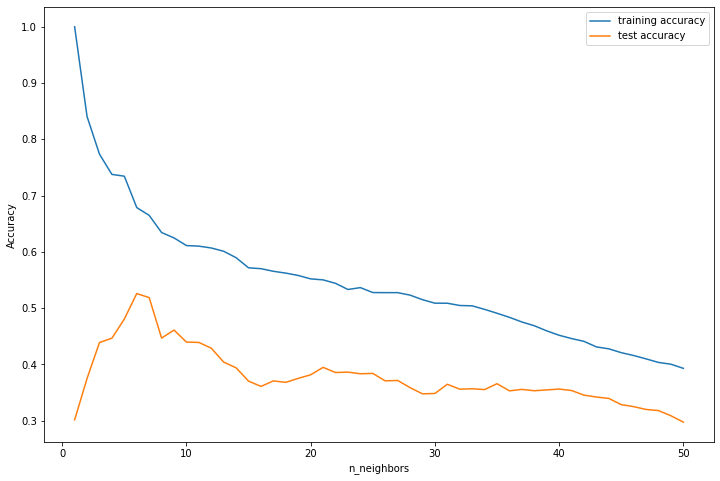

In [34]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # create model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # accuracy check
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording change
    test_accuracy.append(clf.score(x_test, y_test))


# plotting data
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [35]:
# looking up for the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 6


In [36]:
# MODEL RESULT EVALUTATION
print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
*ARD*      {ard_train_score}           {ard_test_score}
""")


#creating a dictionary for model results
model_p = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


#converting model_performance into a DataFrame
model_p = pd.DataFrame(model_p)


#sending model results to Excel
model_p.to_excel('LMP_birthweightlow.xlsx',
                           index = False)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.6849           0.7134
Lasso      0.6839           0.7209
*ARD*      0.6843           0.7216



In [37]:
#Saving all the birthweight prediction into an excel
prediction_results = pd.DataFrame(data = {
    'Original Sale Prices' : y_test_FULL,
    'LR Predictions'       : lr_pred.round(decimals = 2),
    'Lasso Predictions'    : lasso_pred.round(decimals = 2),
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'LR Deviation'         : lr_pred.round(decimals = 2) - y_test_FULL,
    'Lasso Deviation'      : lasso_pred.round(decimals = 2) - y_test_FULL,
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test_FULL,
    })


prediction_results.to_excel(excel_writer = './birthweight_low_prediction.xlsx',
                            index = False)